<a href="https://colab.research.google.com/github/Spykabore15/road-damage-detection-yolo/blob/main/road_damage_detection03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Road damage detection with YOLO V11 using dataset V2**

### Dependencies installation and configuration

In [ ]:
!pip install mlflow roboflow ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88

In [ ]:
import mlflow
import time
import json
from pathlib import Path
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import userdata
from roboflow import Roboflow
# Import the dataset from roboflow
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key = ROBOFLOW_API_KEY)
project = rf.workspace("alpha-nydx8").project("road-damage-detection-v2-xg6by")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Damage-Detection-v2-2 in yolov11:: 100%|██████████| 8978/8978 [00:01<00:00, 6947.89it/s]


In [ ]:
!yolo settings mlflow=True

✅ Updated 'mlflow=True'
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [ ]:
#mlflow logging conf

mlflow_uri = "/content/drive/MyDrive/YOLOV11_RoadDamage/01 Training Logs/YOLOv11s Dataset V2 (7 class) "
experiment_name = "yolov11s using dataset V2 on yolov11s.pt"

#model config
model = YOLO("yolo11s.pt")


In [ ]:
mlflow.set_tracking_uri(mlflow_uri)
mlflow.set_experiment(experiment_name)


Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534


<Experiment: artifact_location=('/content/drive/MyDrive/Gamma/01 Training Logs/YOLOv11s Dataset V2 (7 class) '
 '/904788174182268727'), creation_time=1763660310132, experiment_id='904788174182268727', last_update_time=1763660310132, lifecycle_stage='active', name='yolov11s using dataset V2 on yolov11s.pt', tags={}>

### Model training

In [ ]:
results = model.train(
    data = "/content/Road-Damage-Detection-v2-2/data.yaml",
    epochs = 100,
    batch = 16,
    imgsz = 640,
    save_period = 10,
    patience = 10,
    verbose = True
)

print("________________TRAINING COMPLETE______________")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Road-Damage-Detection-v2-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, 

2025/11/21 01:14:59 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/11/21 01:14:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


MLflow: logging run_id(f0d7fa8c1b354b84a0c0a17042c004c4) to /content/drive/MyDrive/Gamma/01 Training Logs/YOLOv11s Dataset V2 (7 class) 
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /content/drive/MyDrive/Gamma/01 Training Logs/YOLOv11s Dataset V2 (7 class) '
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      3.98G      1.874      3.109      1.803         55        640: 100% ━━━━━━━━━━━━ 197/197 4.2it/s 47.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 2.3it/s 12.3s
                   all        869       1869      0.468       0.33       0.27      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100       5.1G 

### Model Testing

In [ ]:
print("\n" + "=" * 60)
print("VALIDATION ON THE TEST SET")
print("=" * 60)

# Load the best model
best_model_path = "/content/runs/detect/train/weights/best.pt"

best_model = YOLO(best_model_path)

# Validation
metrics = best_model.val()

# Print the metrics
print(f"\nFinal metrics:")
print(f"  mAP@50:     {metrics.box.map50:.4f}")
print(f"  mAP@50-95:  {metrics.box.map:.4f}")
print(f"  Precision:  {metrics.box.mp:.4f}")
print(f"  Recall:     {metrics.box.mr:.4f}")




VALIDATION ON THE TEST SET
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1515.9±531.2 MB/s, size: 83.2 KB)
val: Scanning /content/Road-Damage-Detection-v2-2/valid/labels.cache... 869 images, 46 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 869/869 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 55/55 6.7it/s 8.2s
                   all        869       1869      0.692      0.719      0.717      0.491
       alligator crack        199        242      0.599      0.734      0.663      0.391
        lane line blur        141        196      0.533      0.551      0.525      0.296
    longitudinal crack        349        641      0.711      0.724       0.76      0.485
         manhole cover        115        118      0.732      0.907      0.806      0.6

### Model Deployment

In [ ]:
MODEL_PATH = '/content/runs/detect/train'
project.version(3).deploy(model_type='yolov11', model_path = MODEL_PATH)

View the status of your deployment at: https://app.roboflow.com/alpha-nydx8/road-damage-detection-v2-xg6by/3
Share your model with the world at: https://universe.roboflow.com/alpha-nydx8/road-damage-detection-v2-xg6by/model/3


# **Analysis**

**Confusion matrix curve**

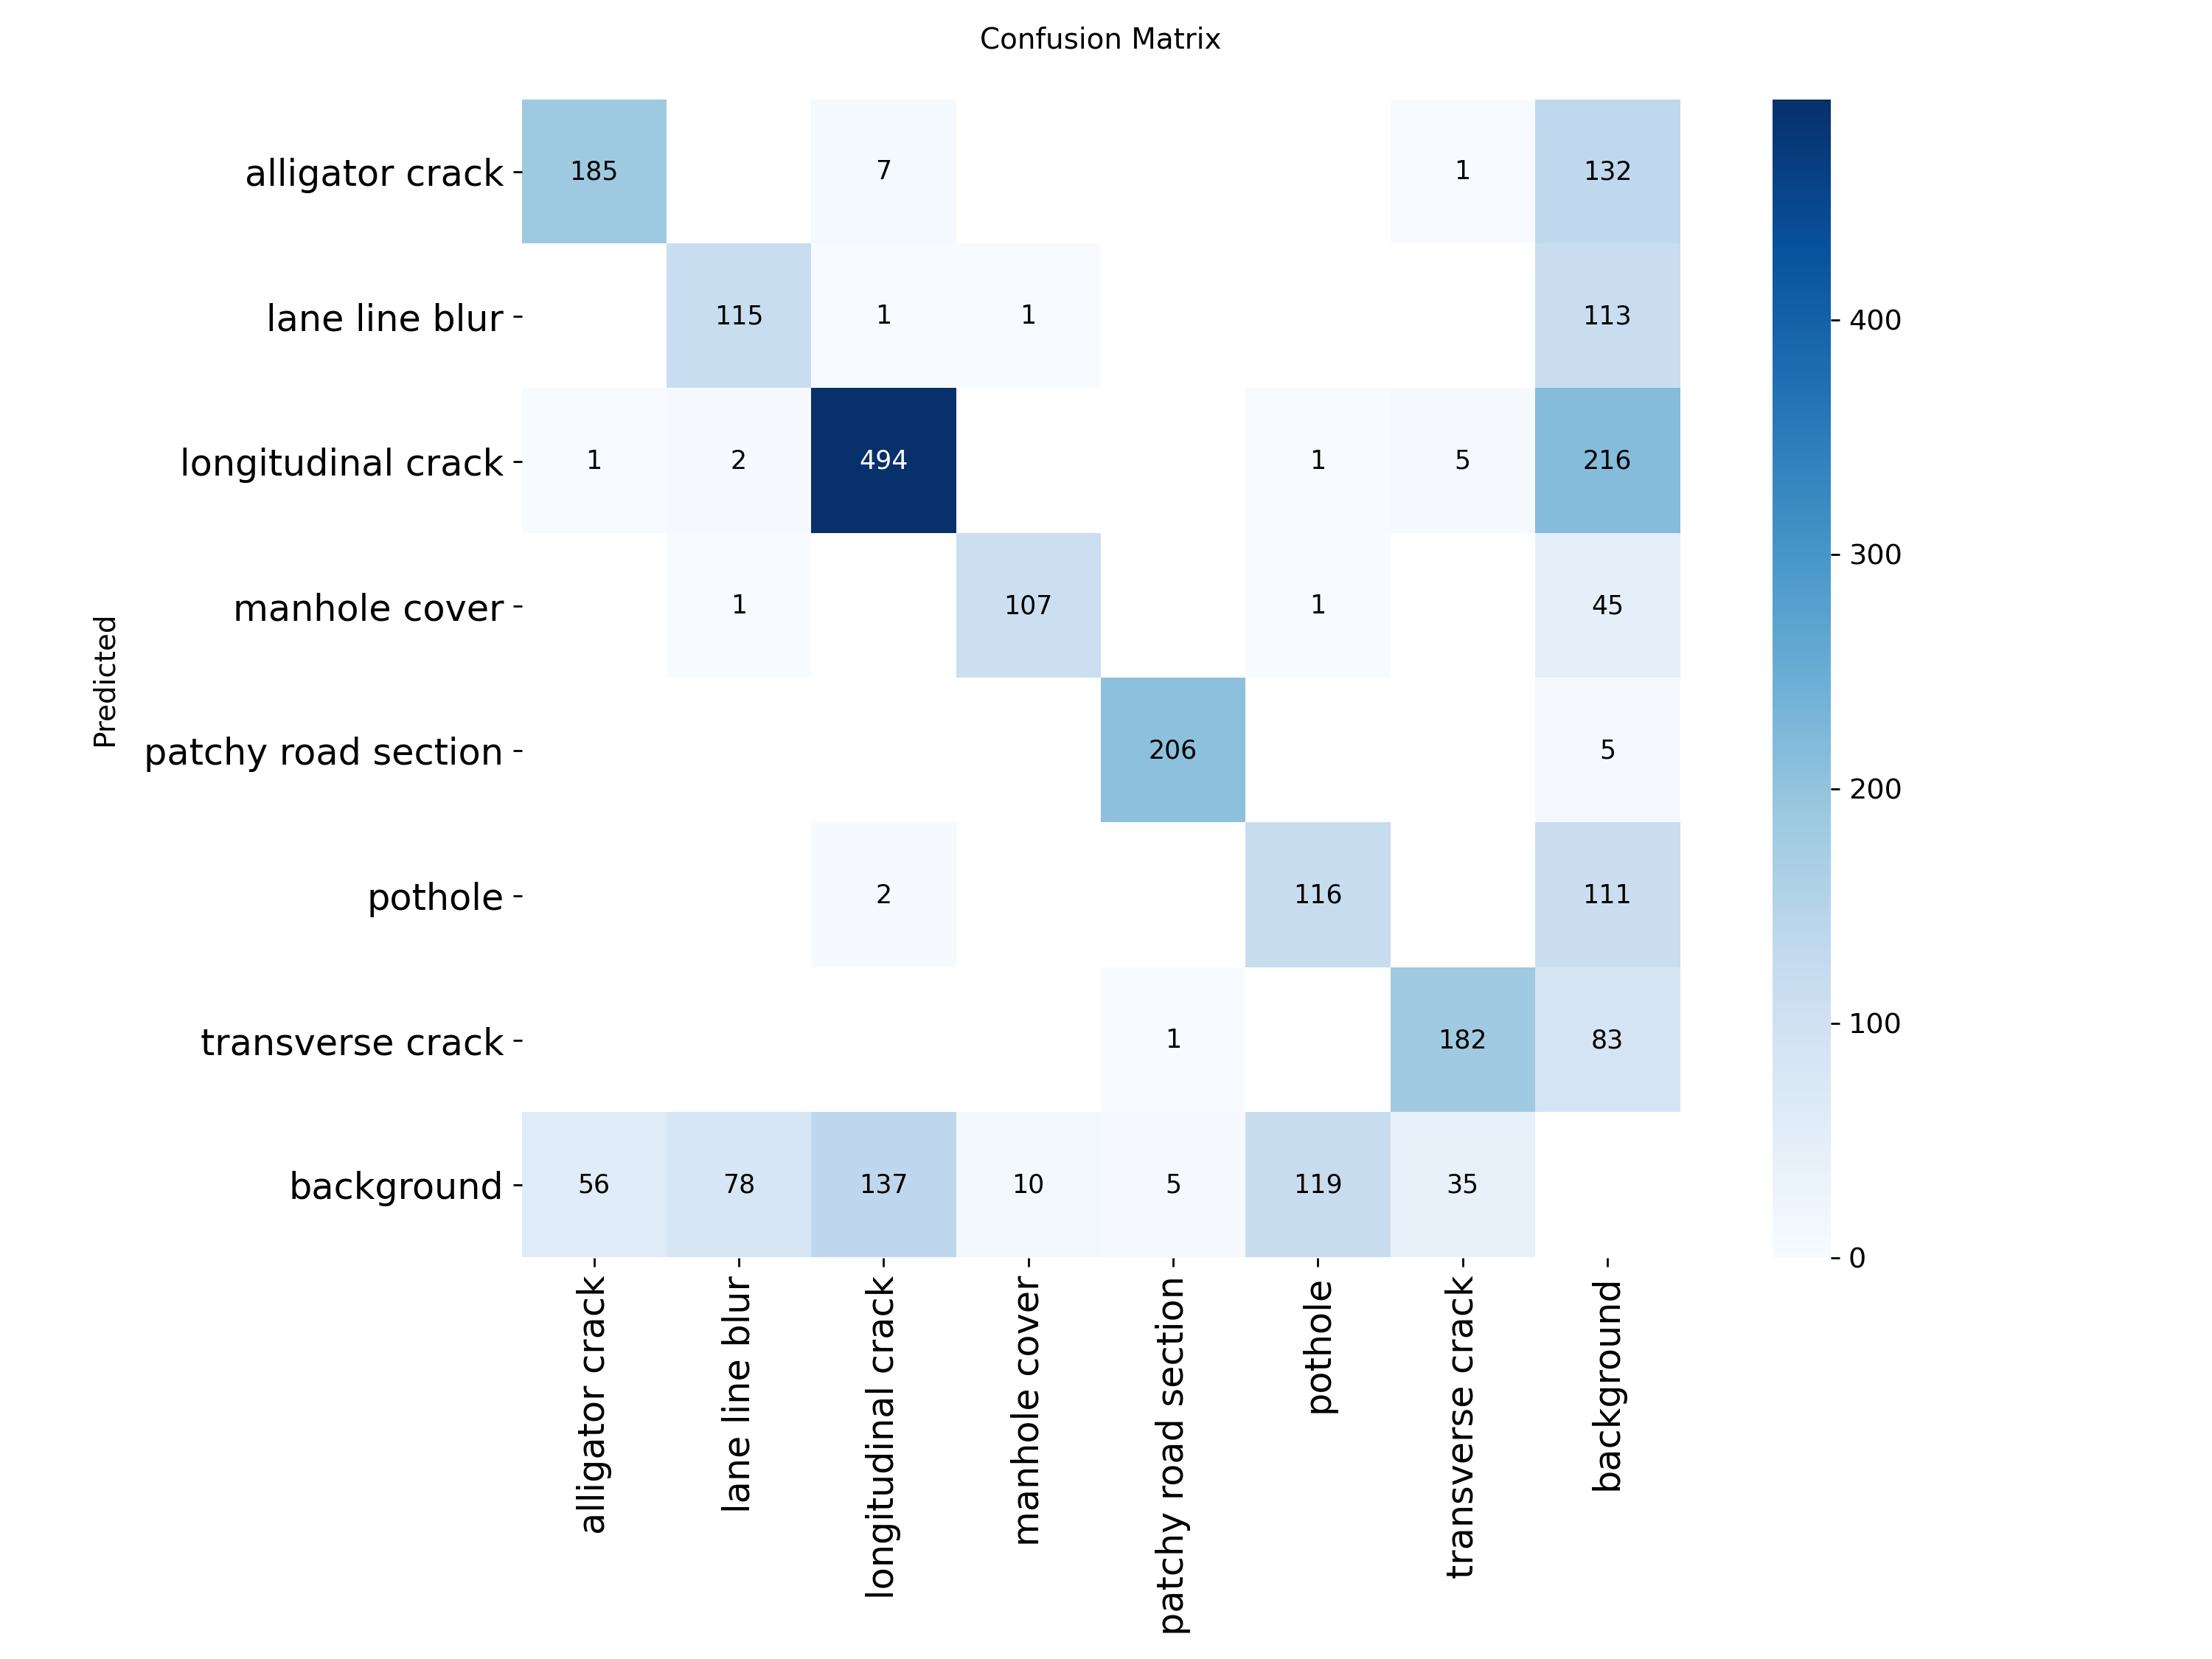

In [1]:
import os
import glob
from IPython.display import Image as IPyImage, display

img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/confusion_matrix.png"
display(IPyImage(filename=img, width=600))

**Loss curves**

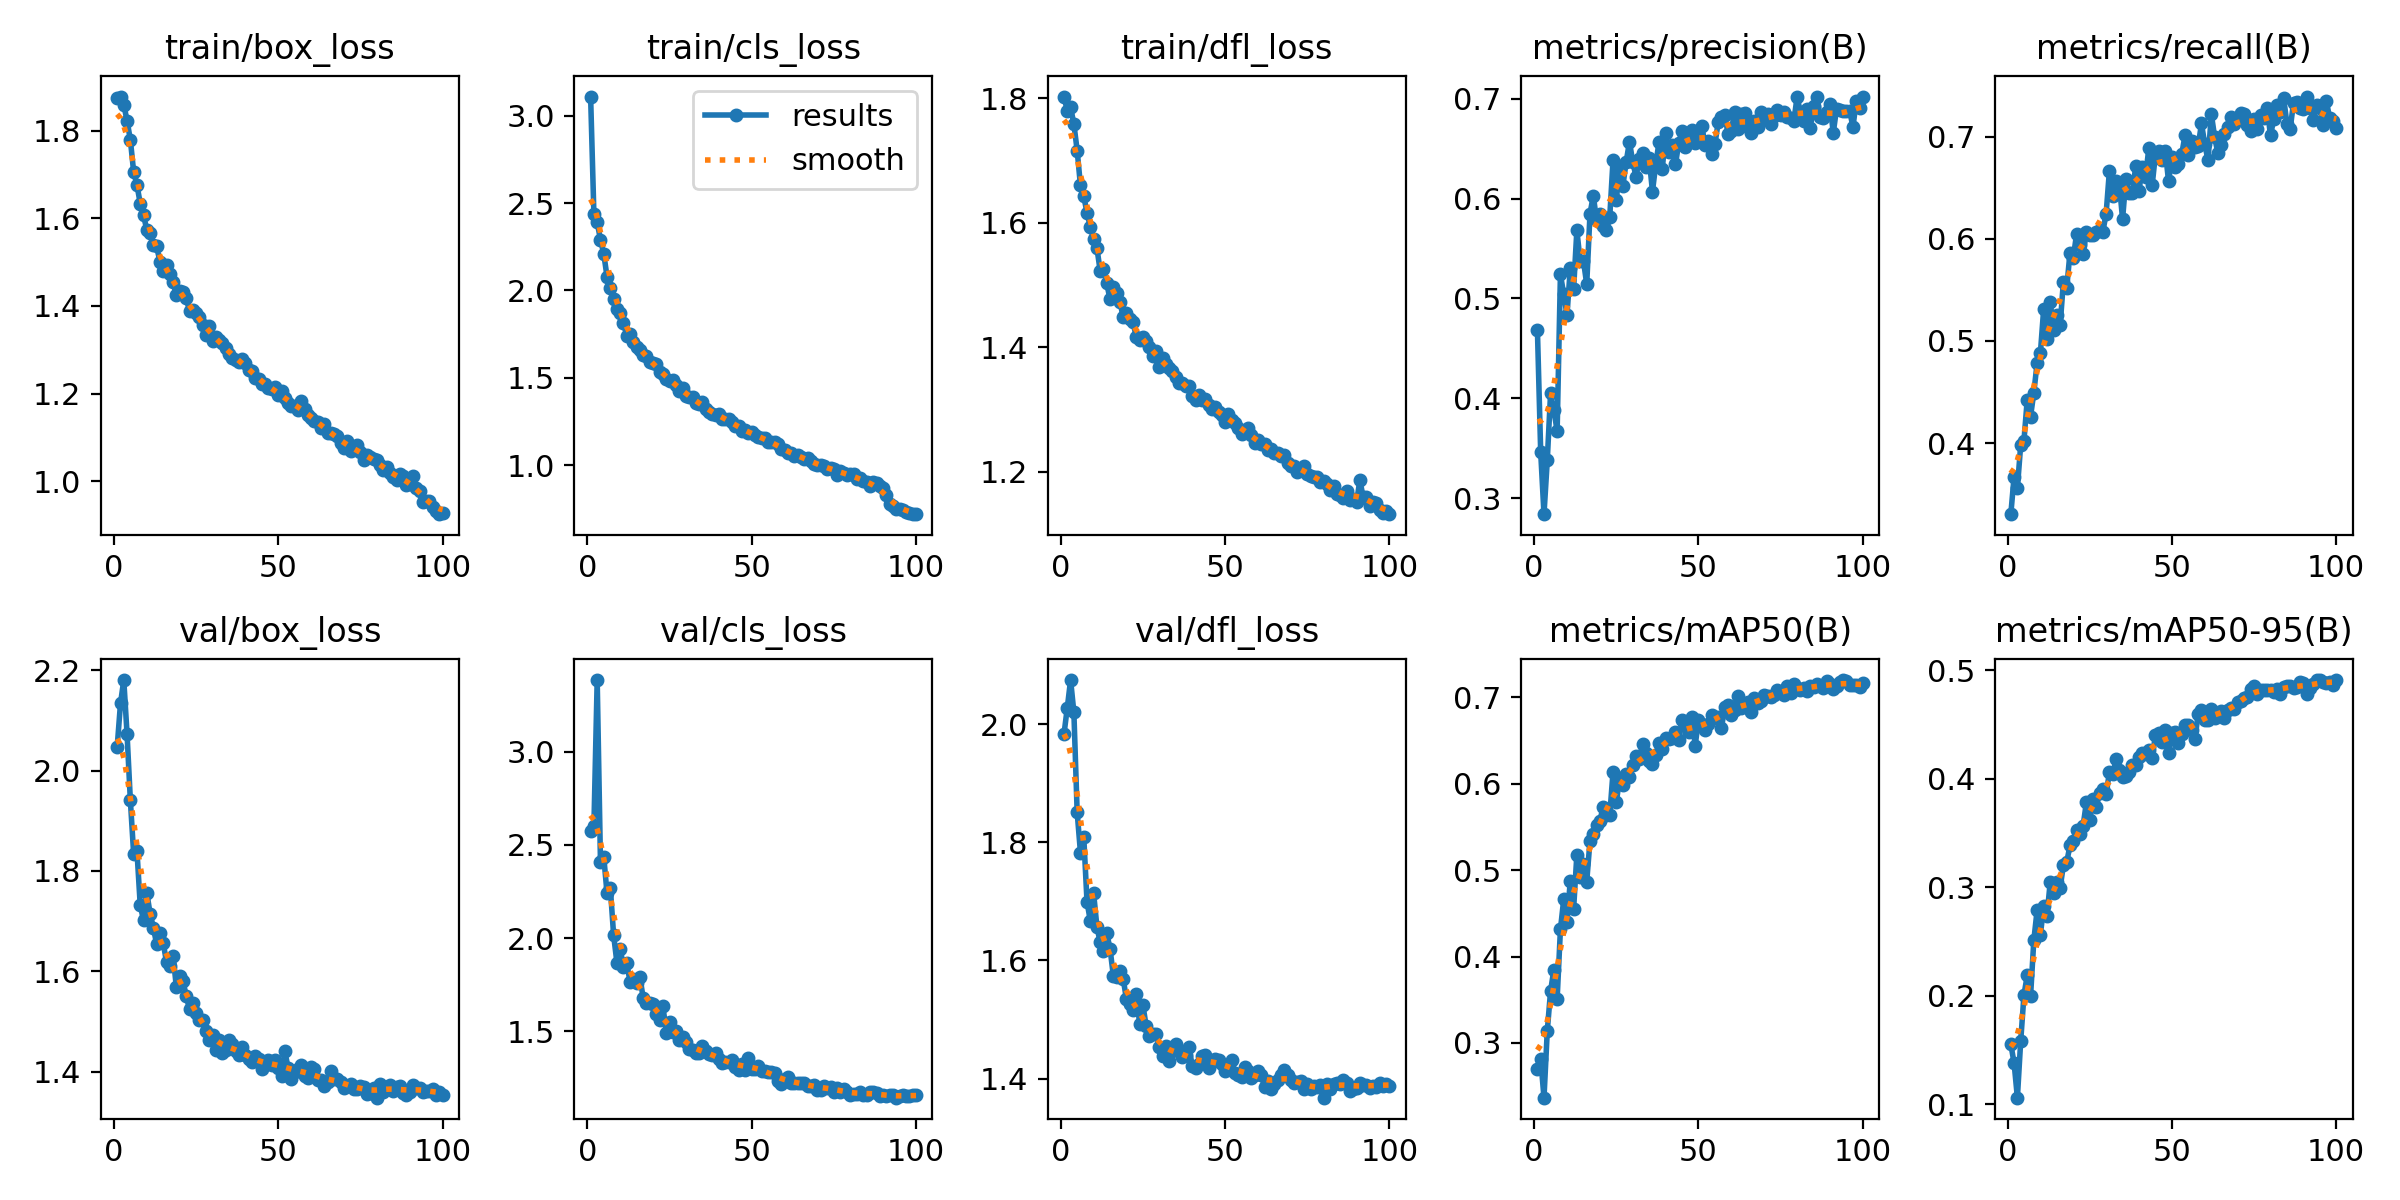

In [2]:
img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/results.png"
display(IPyImage(filename=img, width=600))

**Precision curve**

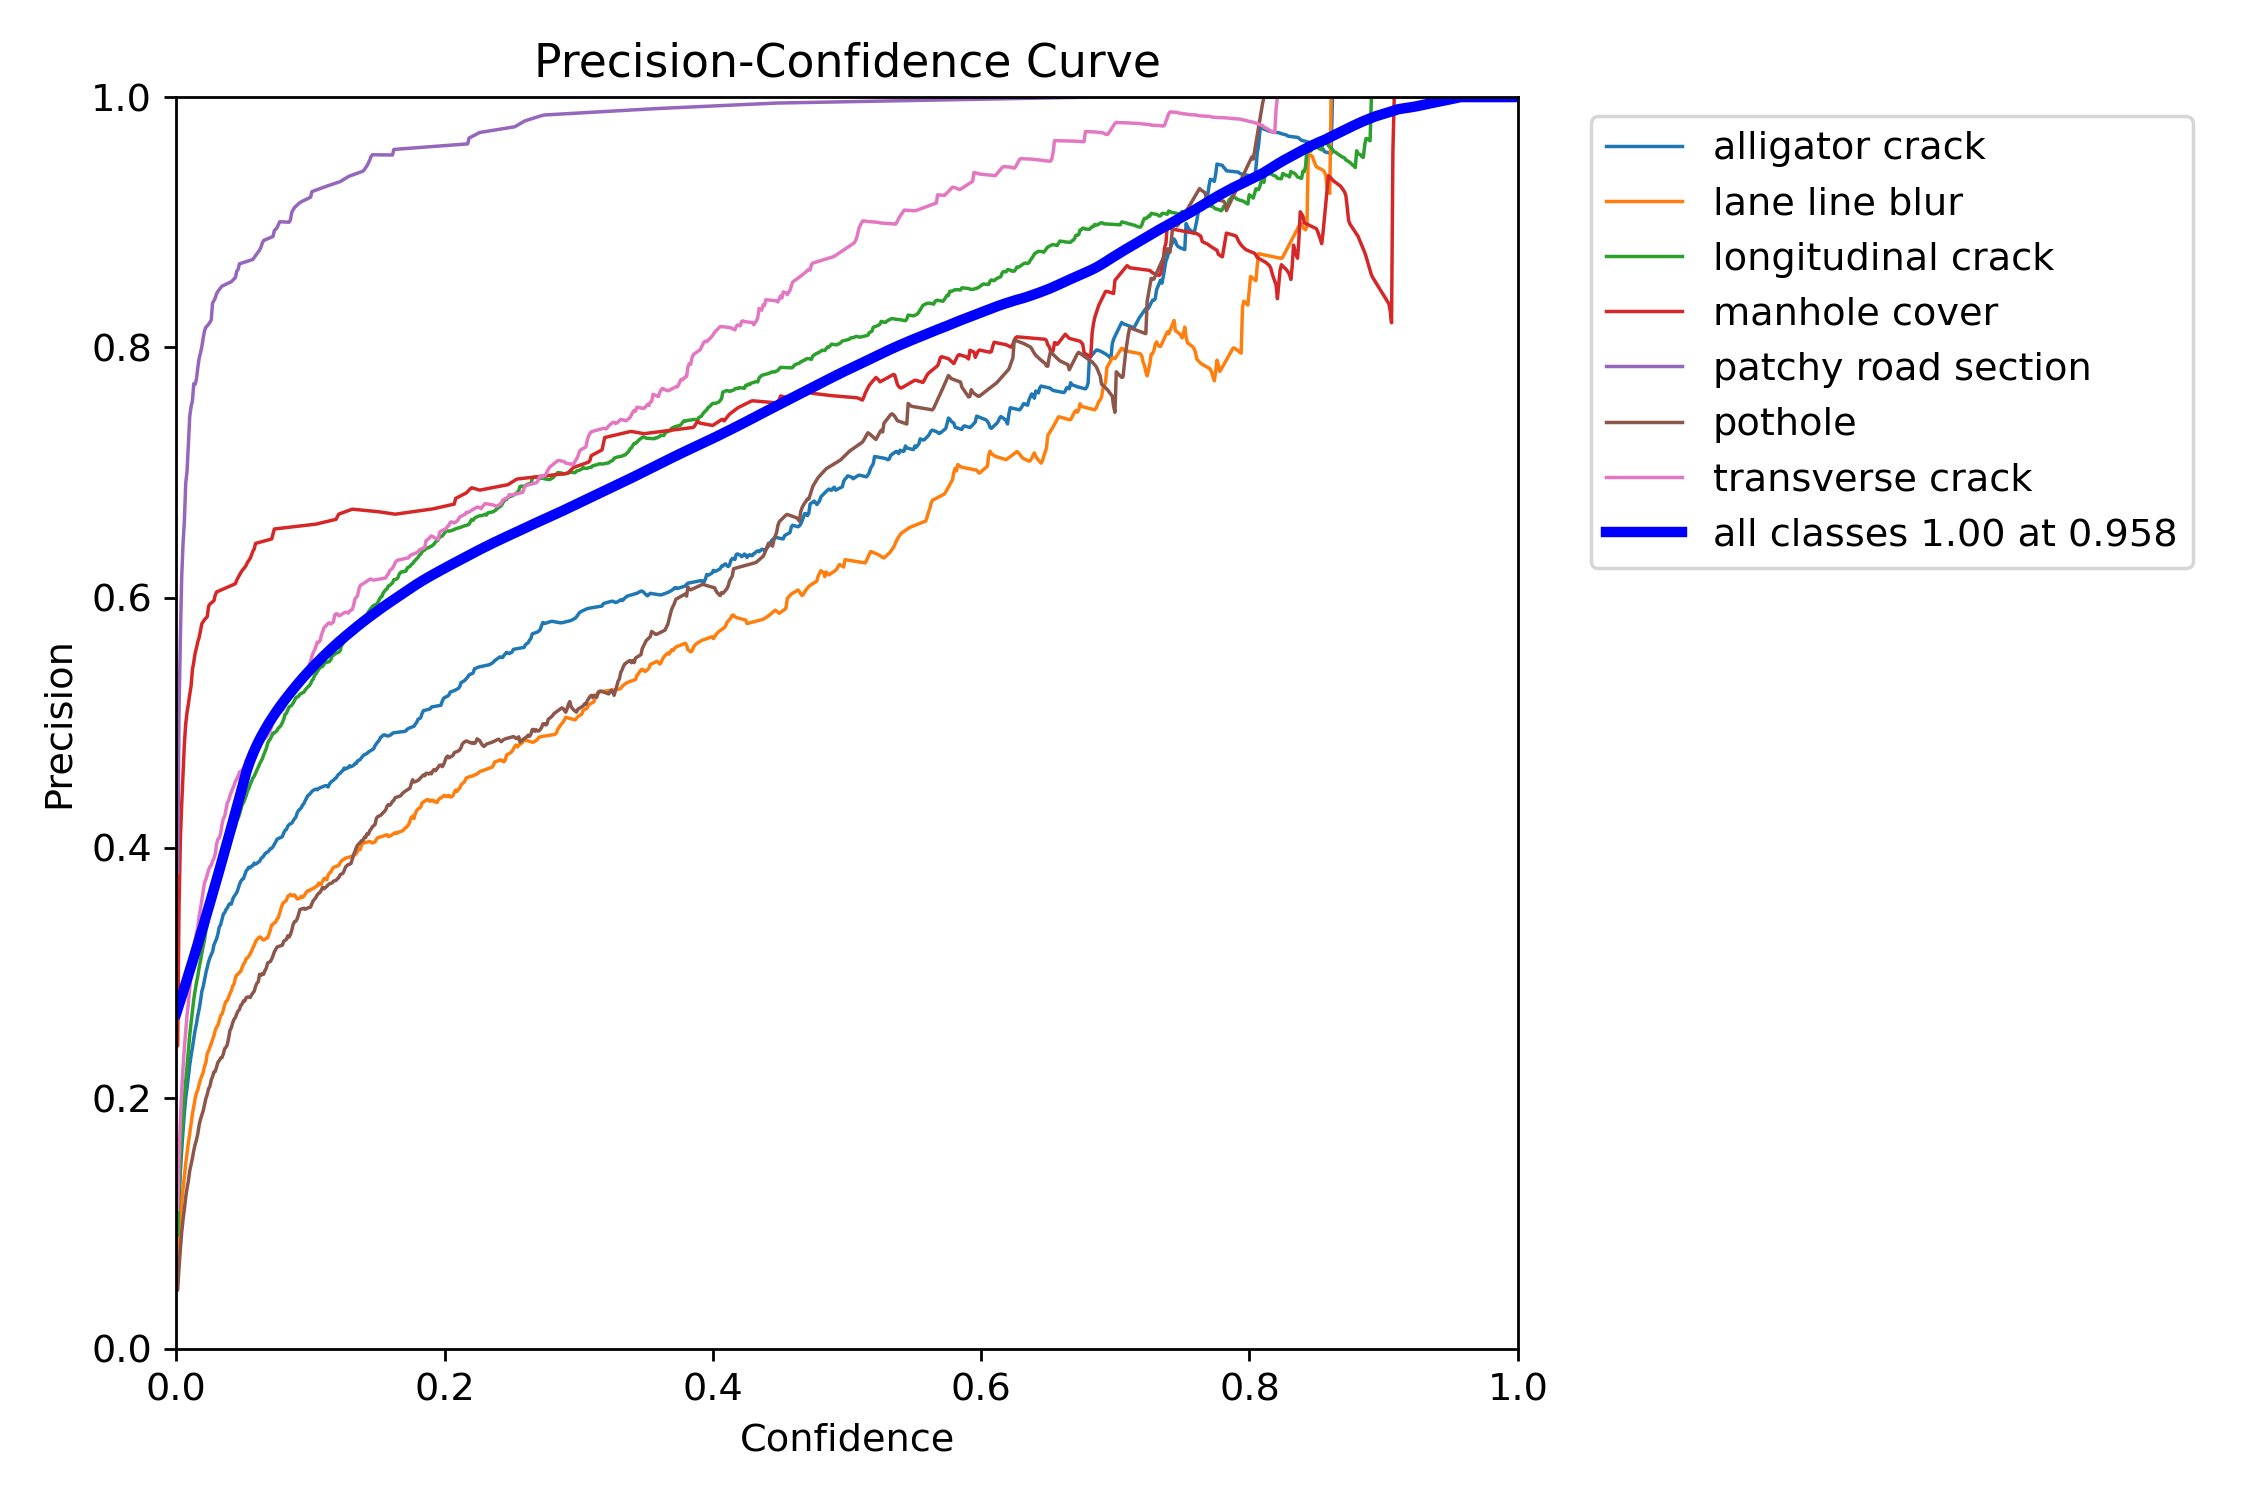

In [3]:
img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/BoxP_curve.png"
display(IPyImage(filename=img, width=600))

**Recall curve**

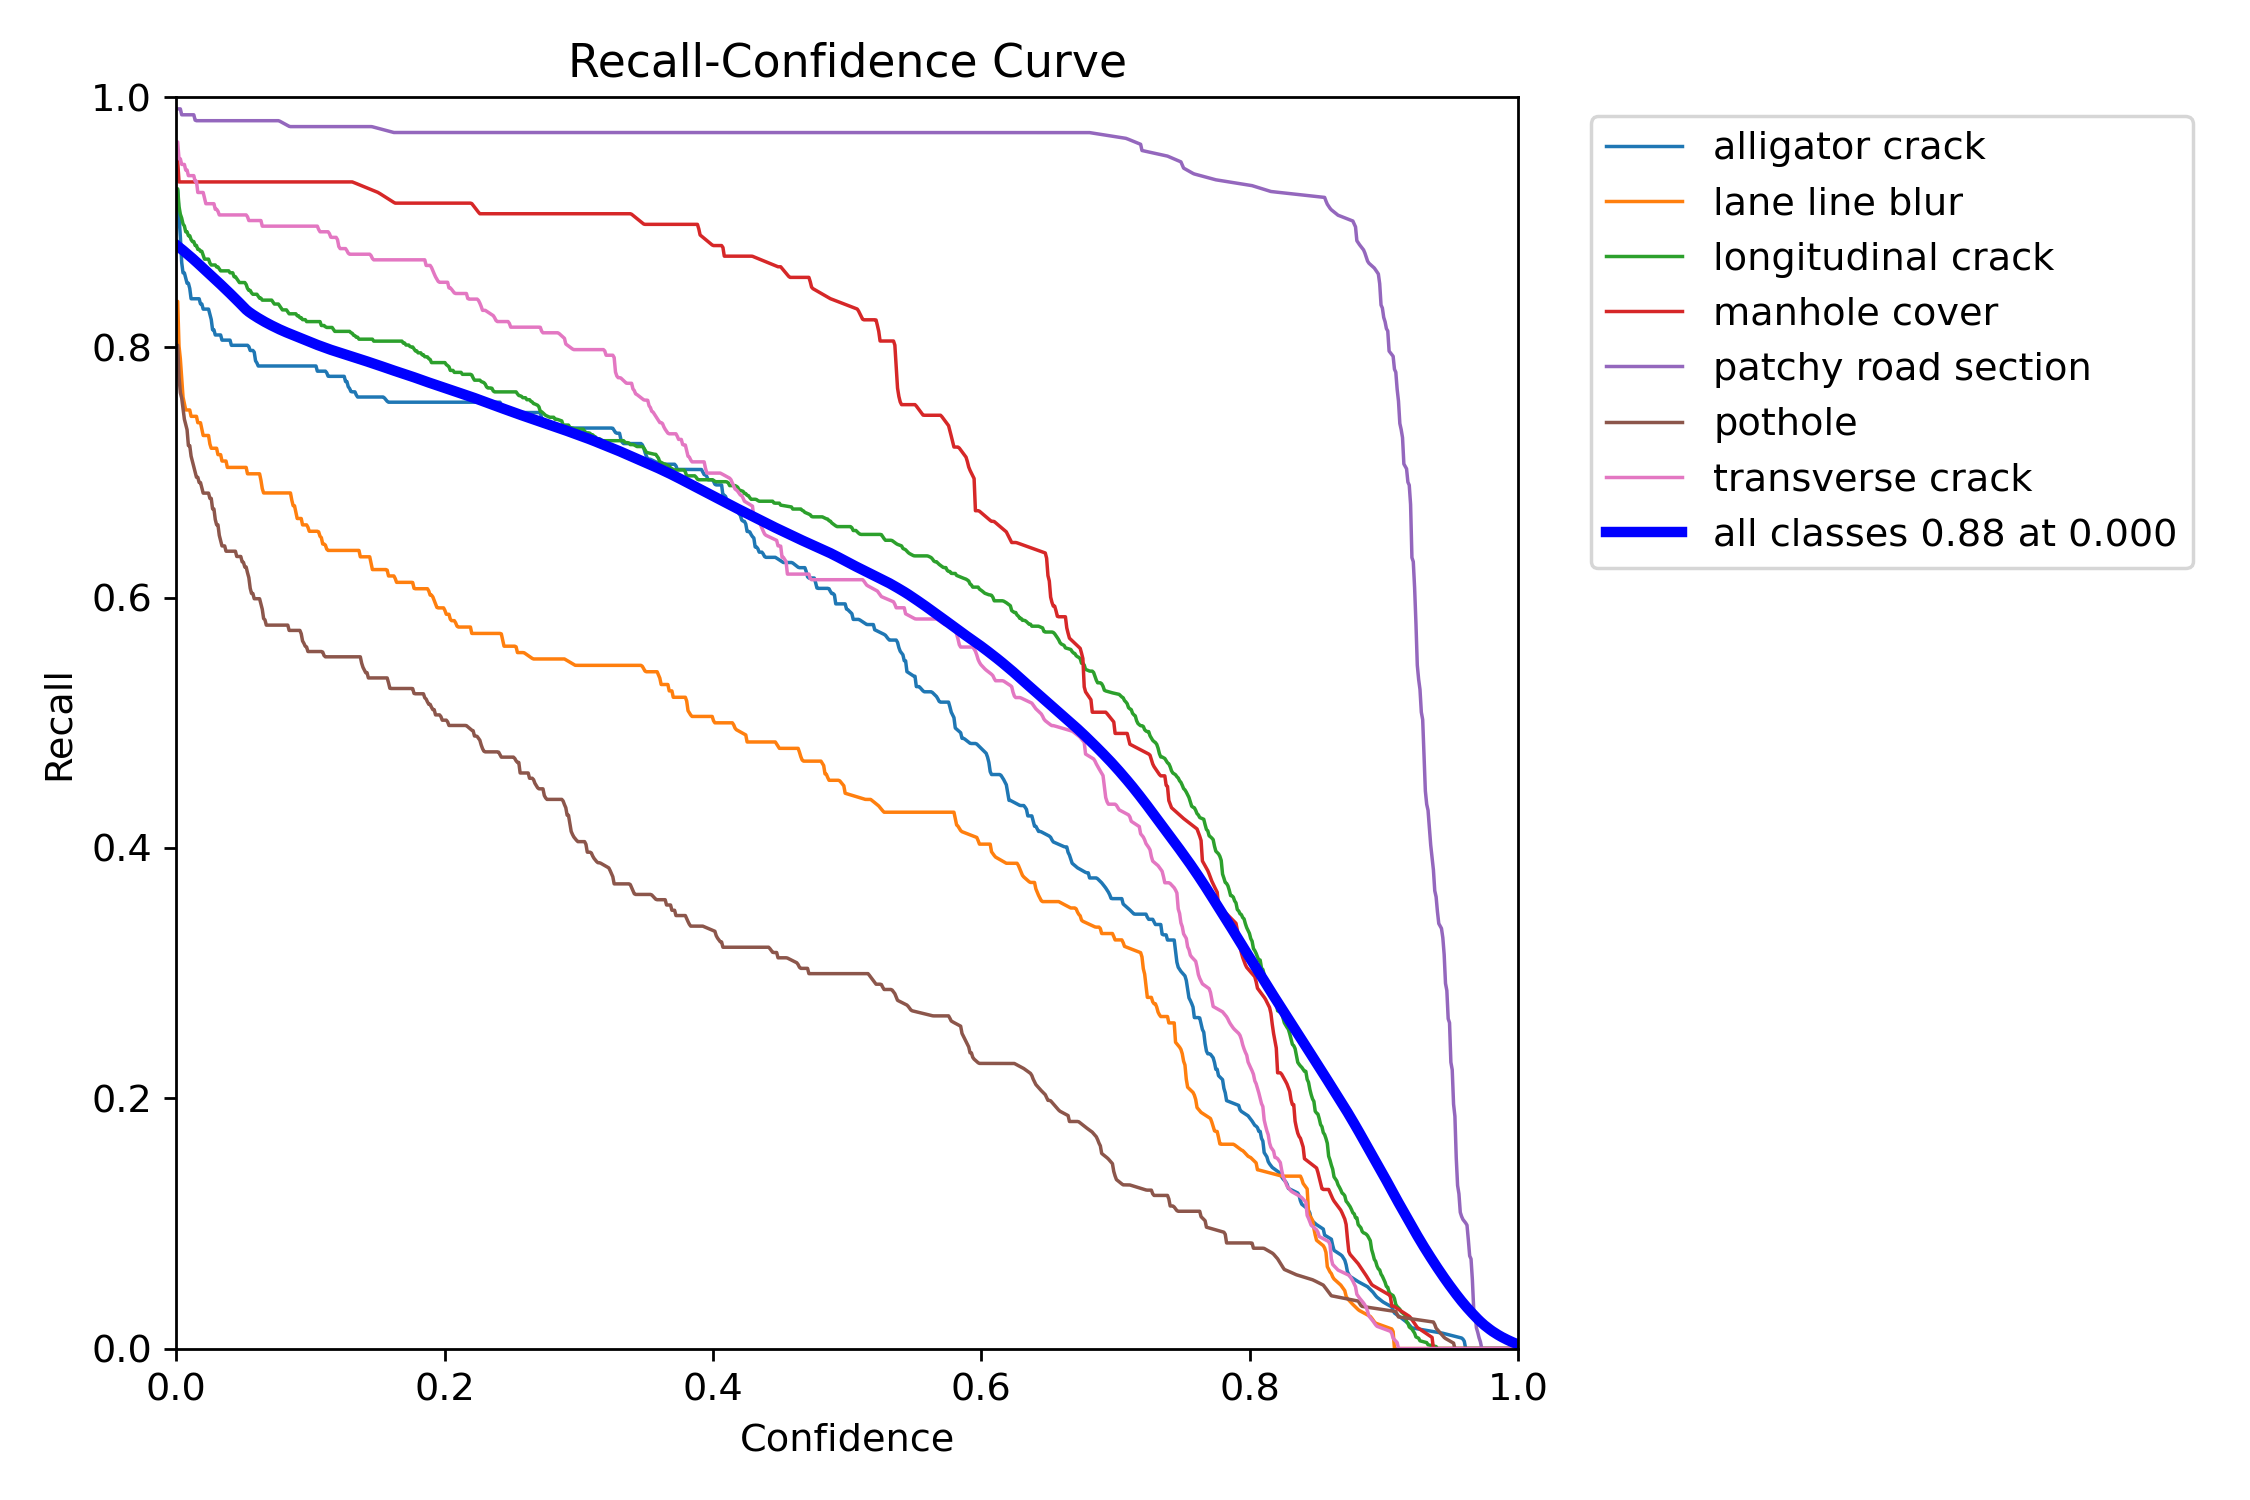

In [4]:
img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/BoxR_curve.png"
display(IPyImage(filename=img, width=600))

**Precision-Recall curve**

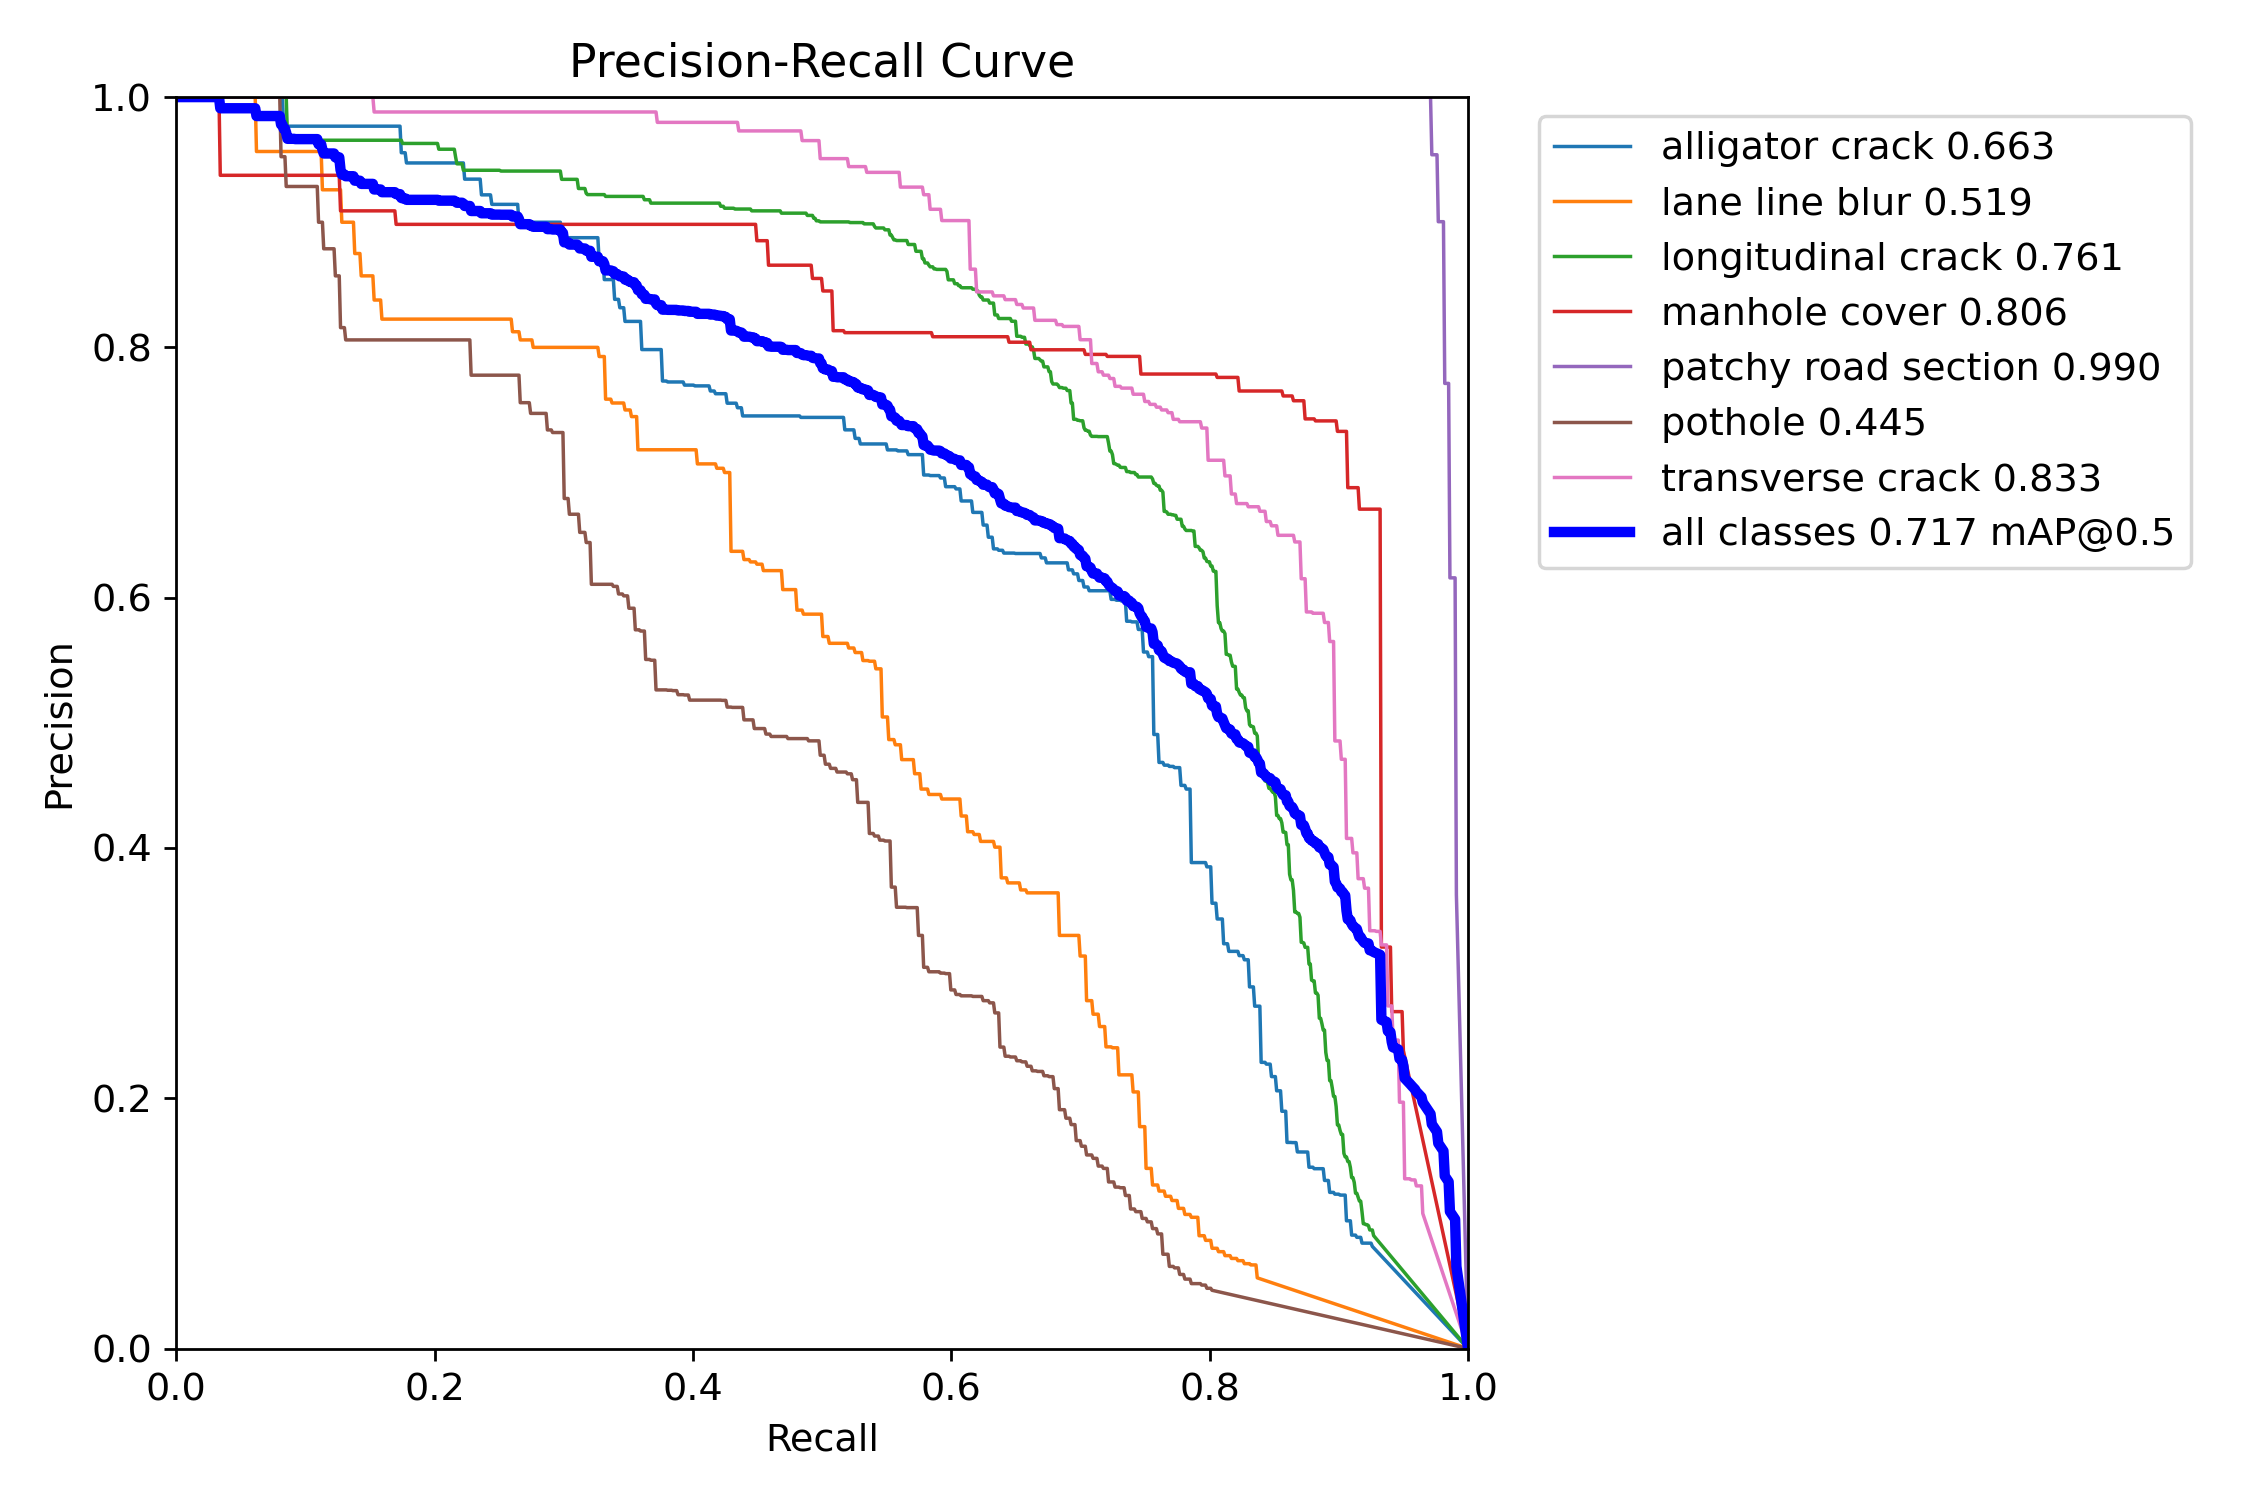

In [5]:
img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/BoxPR_curve.png"
display(IPyImage(filename=img, width=600))

**F1 curve**

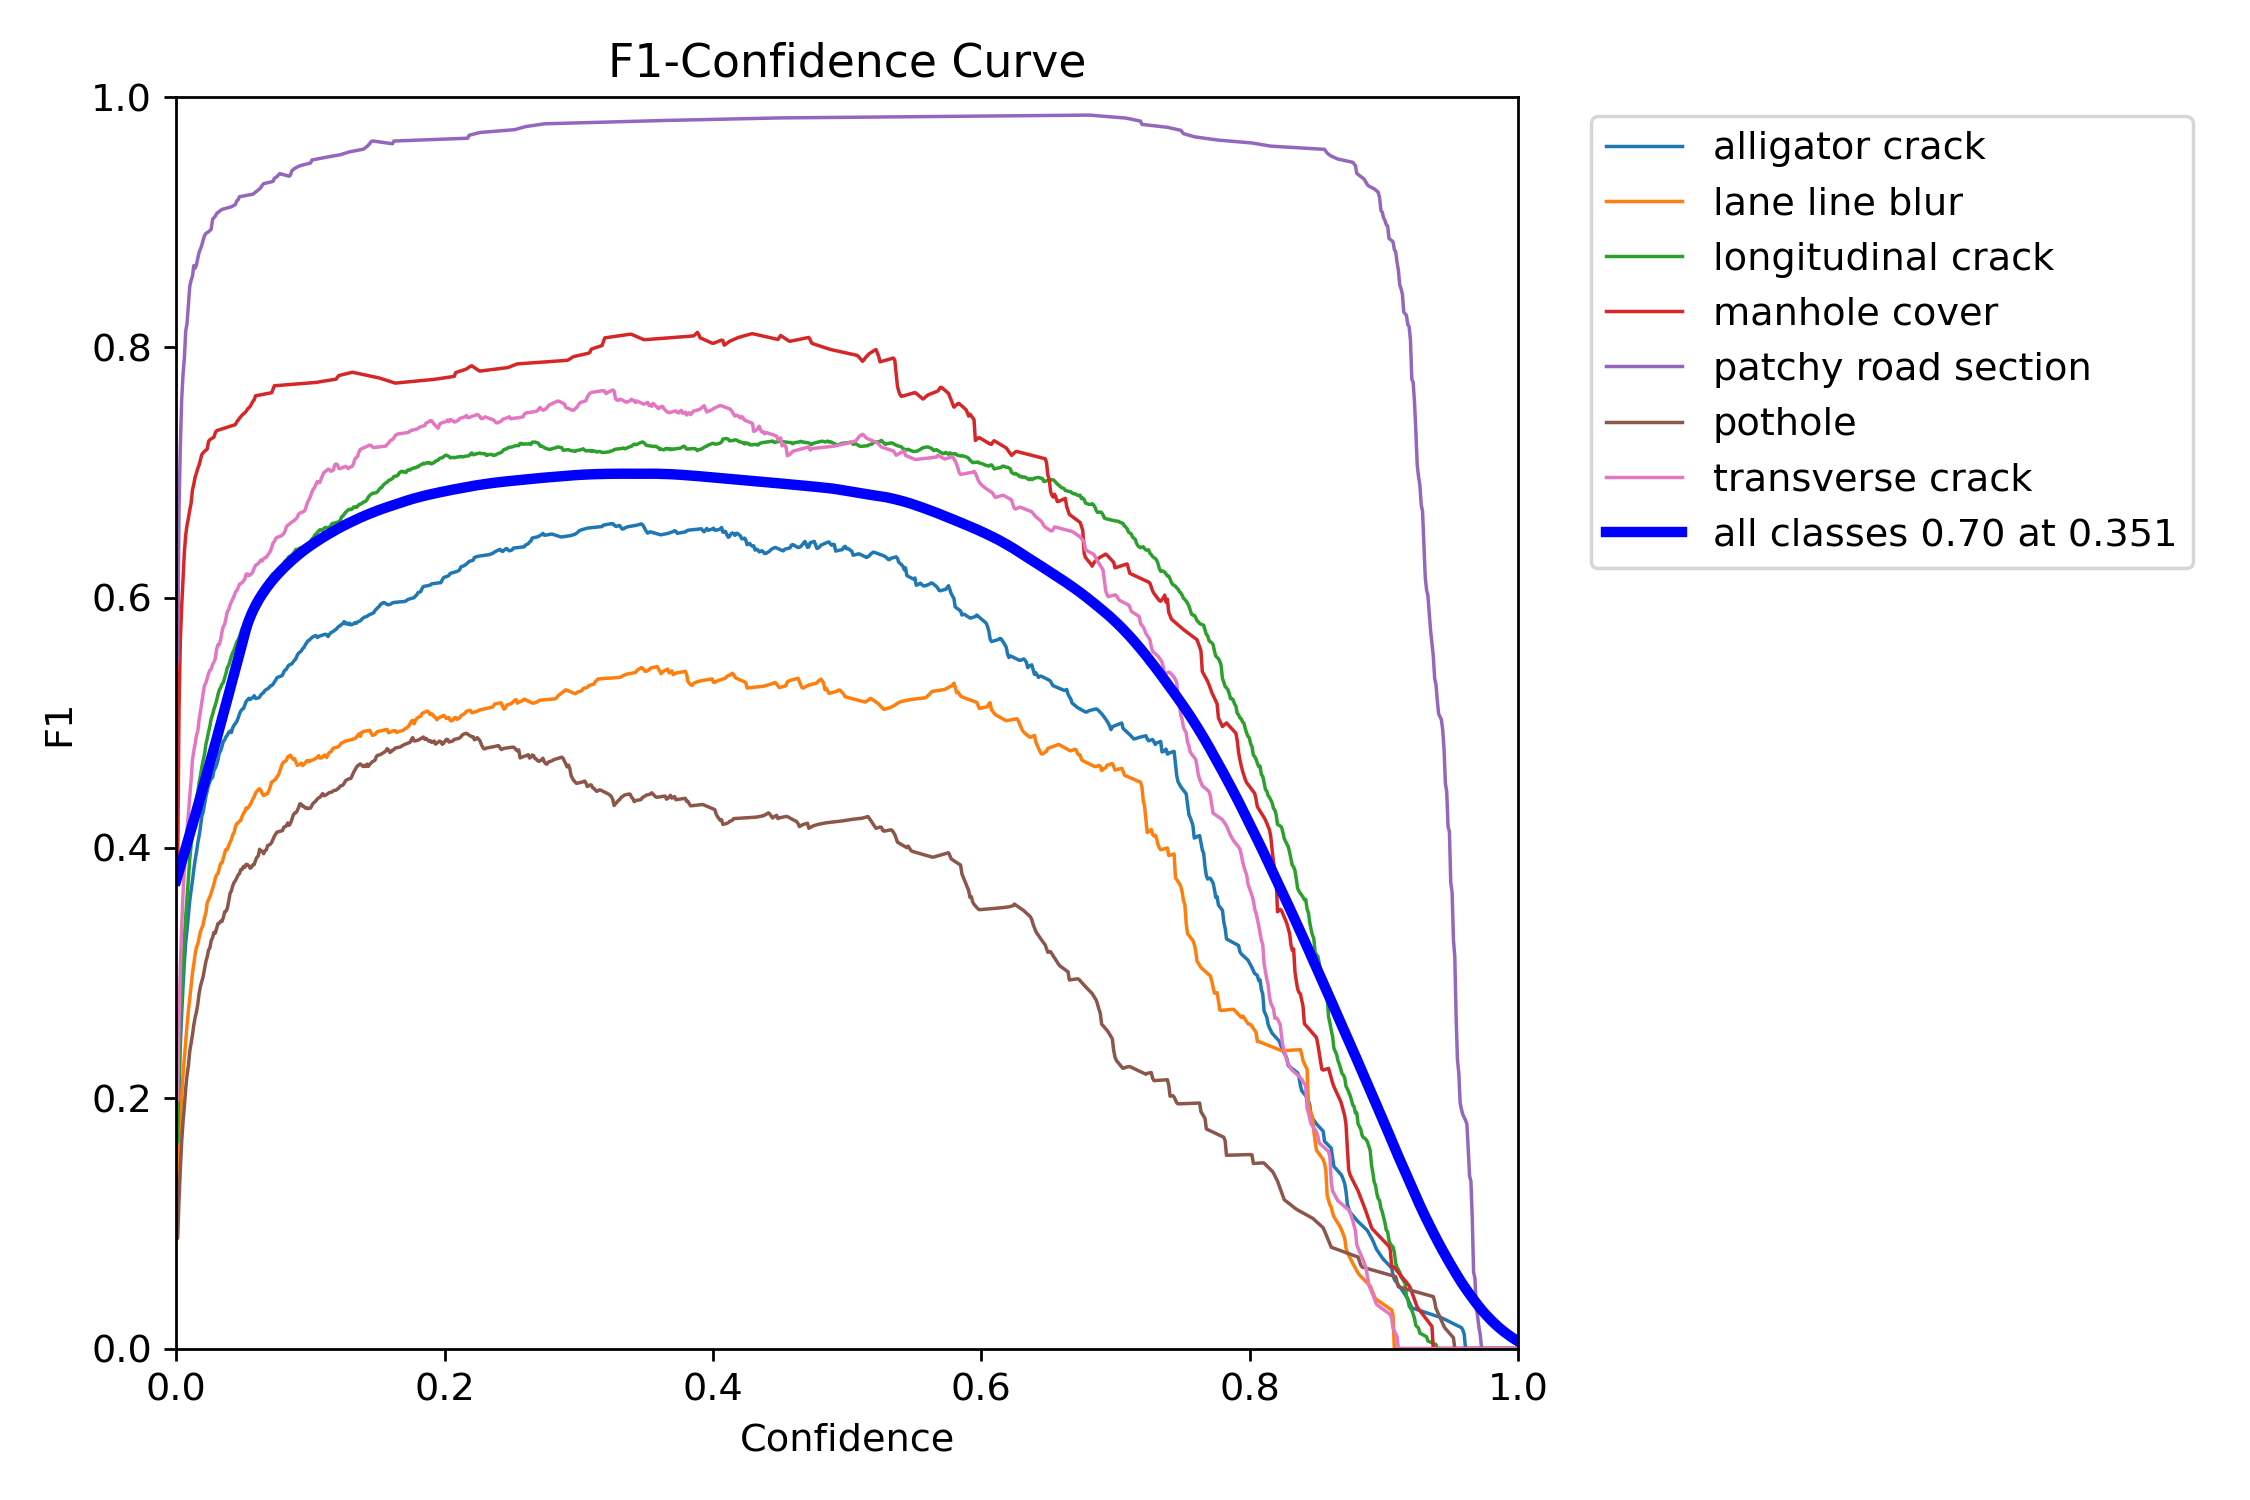

In [6]:
img = "/content/drive/MyDrive/YOLOV11_RoadDamageDetection_V2/01 Training Logs/YOLOv11s Dataset V2 (7 class) /167095629887785115/f0d7fa8c1b354b84a0c0a17042c004c4/artifacts/BoxF1_curve.png"
display(IPyImage(filename=img, width=600))